In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

# Gender Classification

In [106]:
data=pd.read_csv('./gender_classification_v7.csv')

In [107]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


# An explanation of each feature
* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
* forehead_width_cm - This column is in CM's. This is the width of the forehead.
* forehead_height_cm - This is the height of the forehead and it's in Cm's.
* nose_wide - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".	
* distance_nose_to_lip_long	gender - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [109]:
data.shape

(5001, 8)

In [110]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [111]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

#### We can see that our data is clean from Nulls, Later we will also replace the "gender" column to numeric data, Then we can work with numeric data only.

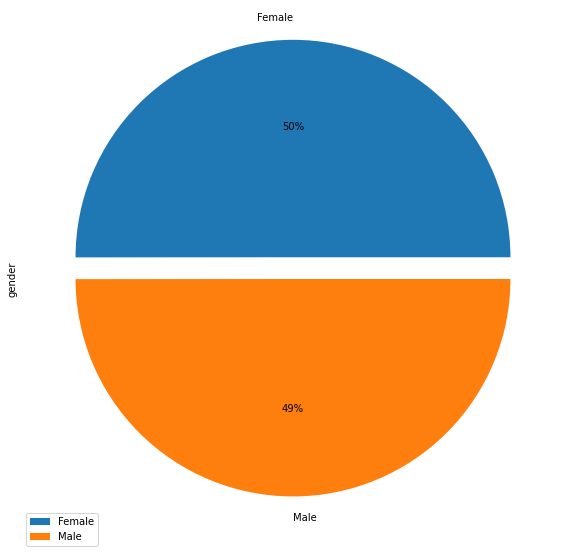

In [112]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

In [113]:
#changing the column 'gender' to numeric data
data['gender'] = data['gender'].str.replace('Male', '1').str.replace('Female', '0').astype('float')


Text(0.5, 1.0, 'Pearson Correlation between different fearures')

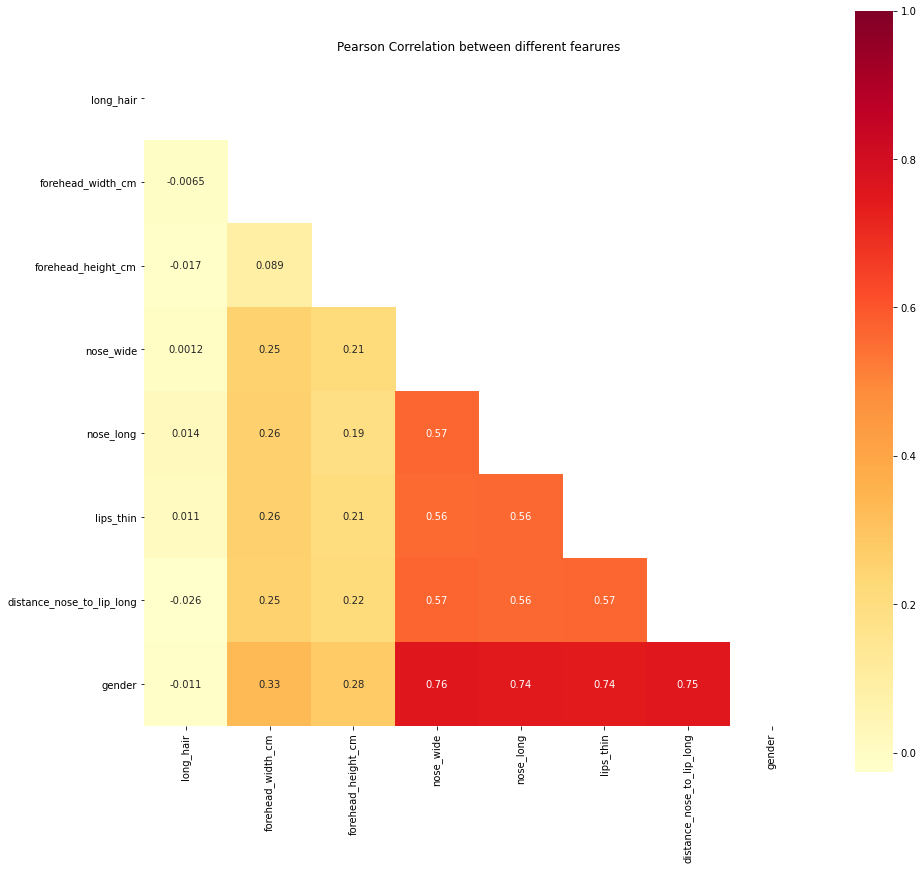

In [114]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap="YlOrRd" ,mask=mask.T)

plt.title('Pearson Correlation between different fearures')

Text(0.5, 1.0, 'width vs height of forehead')

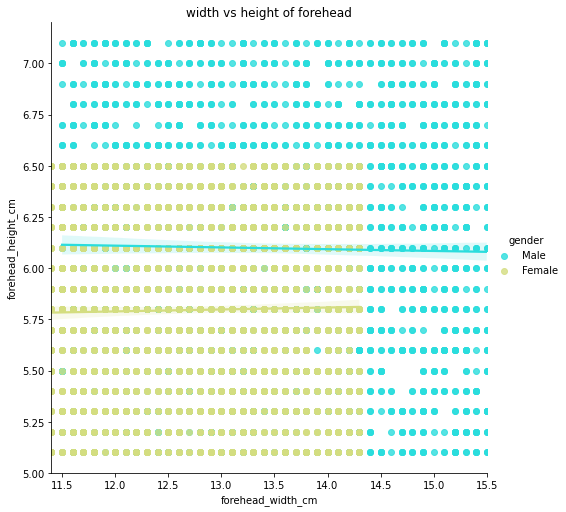

In [58]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=data, palette = 'rainbow', height = 7)
ax = plt.gca()
ax.set_title("width vs height of forehead")

### This graph describe the longer and wider the forehead, the more likely it is that it is a man

Text(0.5, 1.0, 'lips thin vs distance from nose to lip long')

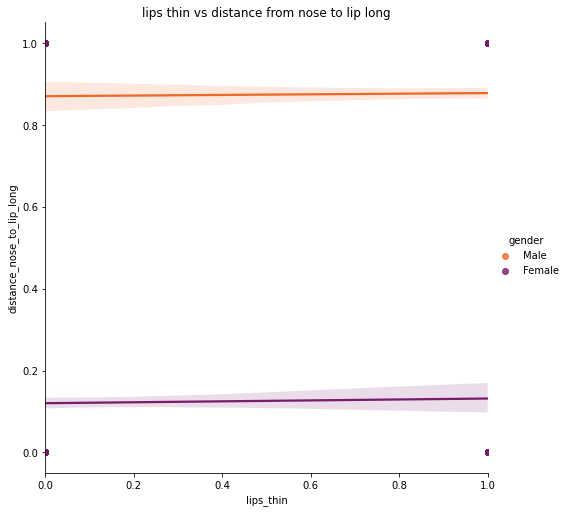

In [61]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=data, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("lips thin vs distance from nose to lip long")

### We can conclude from the graph above that the division is really equal - men have thinner lips and a greater distance from the lip to the chin.

Text(0.5, 1.0, 'wide vs long of nose')

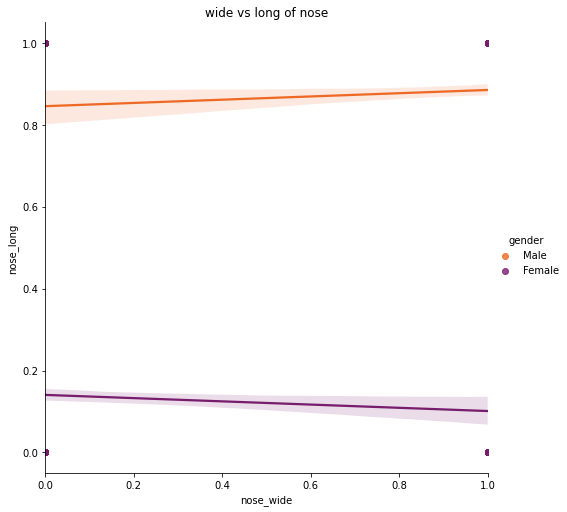

In [60]:
sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=data, palette = 'inferno_r', height = 7)
ax = plt.gca()
ax.set_title("wide vs long of nose")

# Modeling

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  roc_curve
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [116]:
y = data.gender
X = data.drop(['gender'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =np.random.RandomState(0))

## Model selection
Our goal is to train the model so that it can identify whether it is a man or a woman.
For this we will use two models: KNN and Logistic-Regression.

## K Nearest Neighbours 

In [92]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores

[0.9630369630369631,
 0.958041958041958,
 0.9630369630369631,
 0.961038961038961,
 0.965034965034965,
 0.9630369630369631,
 0.962037962037962,
 0.9630369630369631,
 0.964035964035964,
 0.965034965034965,
 0.967032967032967,
 0.9690309690309691,
 0.968031968031968,
 0.968031968031968,
 0.9660339660339661,
 0.967032967032967,
 0.967032967032967,
 0.967032967032967,
 0.965034965034965,
 0.967032967032967,
 0.965034965034965,
 0.965034965034965,
 0.9660339660339661,
 0.965034965034965,
 0.964035964035964]

Text(0, 0.5, 'Testing Accuracy')

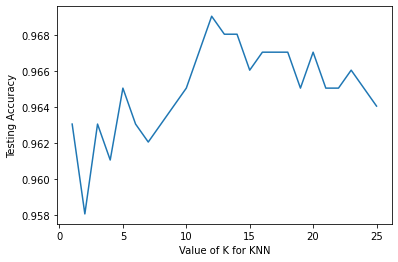

In [93]:
# the connection between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

* From the above graph it can be concluded that the ideal k in that case is k=12.

In [98]:
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[0.95409182 0.962      0.974      0.962      0.978      0.98
 0.976      0.964      0.98       0.974     ]


In [99]:
print(score.mean())

0.9704091816367265


Text(0.5, 1.0, 'Confiusion Matrix')

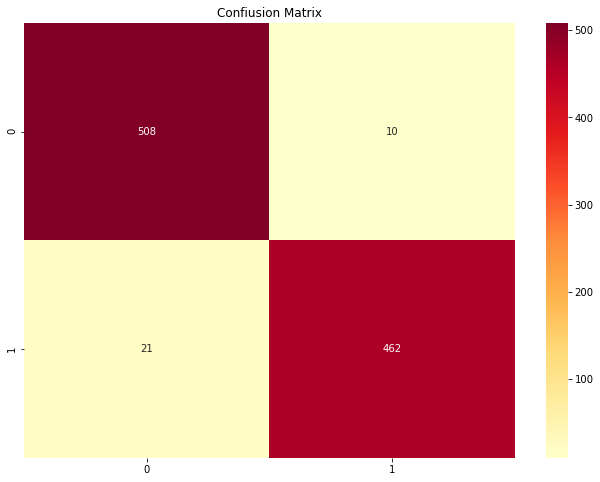

In [101]:
# instantiate the model with the best known parameters
knn=KNeighborsClassifier(n_neighbors=12)
# train the model with X and y (not X_train and y_train)
knn.fit(X_train, y_train)
# make a prediction for an out-of-sample observation
pred=knn.predict(X_test)
#
con=confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(con, annot=True, fmt='g', cmap="YlOrRd")
plt.title('Confiusion Matrix')

In [102]:
metrics.accuracy_score(y_test, pred)

0.9690309690309691

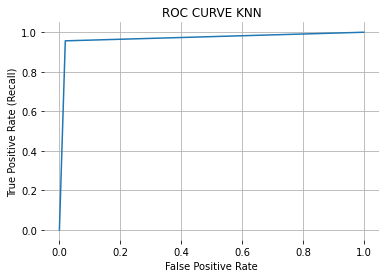

The score for the ROC Curve is: 96.89999999999999%


In [130]:
fpr, tpr, _= roc_curve(y_test, pred)
auc= roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")